# 1. Importação de Bibliotecas e Carga de Dados

In [1]:
! pip install folium
! pip install wordcloud

In [2]:
#Importing Libraries
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#Fetaure Selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#Modelling Algoritm
from sklearn.cluster import KMeans

import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
import requests
import json

from wordcloud import WordCloud

#%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D
#plt.rcParams['figure.figsize'] = (16, 9)
#plt.style.use('ggplot')

from datetime import datetime

In [3]:
#Load the data
customers_case = pd.read_csv('customers_case.csv')
orders_case = pd.read_csv('orders_case.csv')

In [4]:
customers_case.head()

,uid,gender,status,statusUpdatedAt,statusPrevious,age,areaCode,state,recurrence,activation date,end portability date,current package
0,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2/14/2021,paymentFailedSubscription,27,17,SP,monthly,12/12/2020,12/16/2020,customPackage
1,011nhqQ4gyMCNfwLdjjXaRPo5PF3,masculino,active,3/3/2021,activationComplete,32,64,GO,monthly,3/3/2021,3/6/2021,customPackage
2,01zSzL2oaLYLVlsHeHFyiVyyvf82,masculino,canceled,2/21/2021,cancelRequested,54,11,SP,weekly,10/23/2020,NaN,customPackage
3,027onaL5DKXWigqGc4ZOiBniTJC2,feminino,active,3/3/2021,processingSubscription,54,19,SP,weekly,9/9/2020,9/15/2020,customPackage
4,02DozqKFn1RmId9AKn0xPumtb8L2,feminino,active,2/16/2021,processingSubscription,30,11,SP,monthly,9/16/2020,9/21/2020,customPackage


In [5]:
orders_case.head()

,order_id,customer_id,produtos,# pacotes,preços,totais por item,created_at
0,or_4Xz6xWbt4TgodBv3,vqjGBJvV3FSW6iVyrZJcqc7bpcp2,10 SMS Top Up,1,1.0,1.0,11/3/2021
1,or_OA9wkYlBFzU4Z18p,egTCtqIGIdUcYJ9YW5XR9jGT0xq1,Renovação do APP,1,2.0,2.0,11/3/2021
2,or_gx7JQkmhBGuZdA5B,yFAto5jZikc2Qn8GpBgQ2JpCjQa2,30 Minutos de Ligação Top Up,1,3.0,3.0,11/3/2021
3,or_Agv82WqRiOFmJPOw,WdvWQvptawckUZjMHslFsb6fni62,30 Minutos de Ligação Top Up,1,3.0,3.0,11/3/2021
4,or_bqKL5ZVtNf85O90G,O3ildaFLPCRQuBwslcxNz2sbQRP2,30 Minutos de Ligação Top Up,1,3.0,3.0,11/3/2021


# 2. Pré-processamento dos Datos

#### Nomes de colunas

In [6]:
# Adequamos os nomes das colunas para que não tenham espaço entre as palavras
# Customer
customer_columns = customers_case.columns.to_list()
customer_columns_replaced = []

for column in customer_columns:
    new_name = column.replace(' ','_')
    customer_columns_replaced.append(new_name)
    
customers_case.columns = customer_columns_replaced 
customers_case.columns 

Index(['uid', 'gender', 'status', 'statusUpdatedAt', 'statusPrevious', 'age',
       'areaCode', 'state', 'recurrence', 'activation_date',
       'end_portability_date', 'current_package'],
      dtype='object')

In [7]:
#Adequando o nome da coluna customer_id
customers_case = customers_case.rename(columns = {'uid':'customer_id'})

In [8]:
# Orders
orders_columns = orders_case.columns.to_list()
orders_columns_replaced = []

for column in orders_columns:
    new_name = column.replace('# ','').replace(' ','_')
    orders_columns_replaced.append(new_name)
    
orders_case.columns = orders_columns_replaced 
orders_case.columns 

Index(['order_id', 'customer_id', 'produtos', 'pacotes', 'preços',
       'totais_por_item', 'created_at'],
      dtype='object')

#### Tipos de dados

Essa etapa tem como objetivo ajustar os tipos de dados de acordo com suas características.

<b> customers_case:</b> As variáveis age, activation_date e end_portability_date não possuem o tipo de dado adequado, que são inteiro e data respectivamente. Desta forma, procedemos para corrigí-los:

In [9]:
customers_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           5130 non-null   object
 1   gender                5130 non-null   object
 2   status                5130 non-null   object
 3   statusUpdatedAt       5130 non-null   object
 4   statusPrevious        5130 non-null   object
 5   age                   5130 non-null   object
 6   areaCode              5130 non-null   int64 
 7   state                 5130 non-null   object
 8   recurrence            5130 non-null   object
 9   activation_date       5130 non-null   object
 10  end_portability_date  2023 non-null   object
 11  current_package       5130 non-null   object
dtypes: int64(1), object(11)
memory usage: 481.1+ KB


In [10]:
#Data
customers_date_columns = ['statusUpdatedAt', 'activation_date', 'end_portability_date']

for col in customers_date_columns:
    customers_case[col] = pd.to_datetime(customers_case[col])

In [11]:
# Inteiro
customers_case['age'] = pd.to_numeric(customers_case['age'])

ValueError: Unable to parse string "#VALOR!" at position 4469

Ao tentar converter os valores de idade como valores numéricos, percebemos que há uma inconsistência na linha 4469, onde a idade não foi registrada corretamente:

In [12]:
customers_case.loc[4469]

customer_id             rrri0ojSzGPORFm5pys1CYzAdR83
gender                                     masculino
status                                        paused
statusUpdatedAt                  2021-02-22 00:00:00
statusPrevious             paymentFailedSubscription
age                                          #VALOR!
areaCode                                          17
state                                             SP
recurrence                                   monthly
activation_date                  2020-12-18 00:00:00
end_portability_date                             NaT
current_package                        customPackage
Name: 4469, dtype: object

Para corrigir essa inconsistência sem precisar deletar tal linha do conjunto de dados, iremos inputar o como idade a média das idades dos outros clientes. Assim, primeiramente calculamos a média das idades:

In [13]:
#Selecionamos a coluna idade
customers_age = customers_case[['age']]

#Removemos a célula com valor inconsistente
customers_age = customers_age.drop(customers_age[customers_age['age']=="#VALOR!"].index)

# Convertemos os valores para inteiro
customers_age['age'] = customers_age['age'].astype(int)

#Calculamos a média dos valores de idade
mean_age = round(customers_age['age'].mean())
print("A média de idade é: %s" % mean_age)

A média de idade é: 29


In [14]:
#Inputamos o valor da média das idades na linha 4469 no dataset customes_case
customers_case['age'] = customers_case['age'].replace('#VALOR!', mean_age)

# Valor de idade corrigido
customers_case.loc[4469]

customer_id             rrri0ojSzGPORFm5pys1CYzAdR83
gender                                     masculino
status                                        paused
statusUpdatedAt                  2021-02-22 00:00:00
statusPrevious             paymentFailedSubscription
age                                               29
areaCode                                          17
state                                             SP
recurrence                                   monthly
activation_date                  2020-12-18 00:00:00
end_portability_date                             NaT
current_package                        customPackage
Name: 4469, dtype: object

In [15]:
# Convertemos a coluna age para valores inteiros
customers_case['age'] = pd.to_numeric(customers_case['age'])

#Colunas com tipos de dados adequados
customers_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5130 entries, 0 to 5129
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           5130 non-null   object        
 1   gender                5130 non-null   object        
 2   status                5130 non-null   object        
 3   statusUpdatedAt       5130 non-null   datetime64[ns]
 4   statusPrevious        5130 non-null   object        
 5   age                   5130 non-null   int64         
 6   areaCode              5130 non-null   int64         
 7   state                 5130 non-null   object        
 8   recurrence            5130 non-null   object        
 9   activation_date       5130 non-null   datetime64[ns]
 10  end_portability_date  2023 non-null   datetime64[ns]
 11  current_package       5130 non-null   object        
dtypes: datetime64[ns](3), int64(2), object(7)
memory usage: 481.1+ KB


<b> orders_case: </b> a variável created_at não está assignada com o tipo date, desta forma procedemos com a correção:

In [16]:
orders_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70255 entries, 0 to 70254
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         70255 non-null  object 
 1   customer_id      70255 non-null  object 
 2   produtos         70255 non-null  object 
 3   pacotes          70255 non-null  int64  
 4   preços           70255 non-null  float64
 5   totais_por_item  70255 non-null  float64
 6   created_at       70255 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.8+ MB


In [17]:
#Data
orders_case['created_at'] = pd.to_datetime(orders_case['created_at'])

In [18]:
orders_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70255 entries, 0 to 70254
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         70255 non-null  object        
 1   customer_id      70255 non-null  object        
 2   produtos         70255 non-null  object        
 3   pacotes          70255 non-null  int64         
 4   preços           70255 non-null  float64       
 5   totais_por_item  70255 non-null  float64       
 6   created_at       70255 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 3.8+ MB


#### Verificar Valores Nulos

In [19]:
customers_case.isnull().sum()

customer_id                0
gender                     0
status                     0
statusUpdatedAt            0
statusPrevious             0
age                        0
areaCode                   0
state                      0
recurrence                 0
activation_date            0
end_portability_date    3107
current_package            0
dtype: int64

In [20]:
orders_case.isnull().sum()

order_id           0
customer_id        0
produtos           0
pacotes            0
preços             0
totais_por_item    0
created_at         0
dtype: int64

A única coluna que possui valores nulos é a coluna referente à data da portabilidade do cliente em orders_case, conclui-se desta forma, que as linhas que possuem NaN indicam que o cliente não solicitou portabilidade. 

# 3. Feature Engineering

Nessa etapa serão criadas novas variáveis com base nas existentes para extração de alguns insights que possam ajudar nas análises.

<b> Customer Tenure: </b> Calcular há quanto tempo (meses) os clientes estão com a empresa.

In [21]:
now = pd.Timestamp.now()
customers_case['tenure'] =(now - customers_case['activation_date']).astype('<m8[M]').astype(int)
customers_case['tenure']

0       3
1       0
2       4
3       6
4       6
       ..
5125    7
5126    4
5127    7
5128    5
5129    5
Name: tenure, Length: 5130, dtype: int32

In [22]:
customers_case.head()

,customer_id,gender,status,statusUpdatedAt,statusPrevious,age,areaCode,state,recurrence,activation_date,end_portability_date,current_package,tenure
0,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3
1,011nhqQ4gyMCNfwLdjjXaRPo5PF3,masculino,active,2021-03-03,activationComplete,32,64,GO,monthly,2021-03-03,2021-03-06,customPackage,0
2,01zSzL2oaLYLVlsHeHFyiVyyvf82,masculino,canceled,2021-02-21,cancelRequested,54,11,SP,weekly,2020-10-23,NaT,customPackage,4
3,027onaL5DKXWigqGc4ZOiBniTJC2,feminino,active,2021-03-03,processingSubscription,54,19,SP,weekly,2020-09-09,2020-09-15,customPackage,6
4,02DozqKFn1RmId9AKn0xPumtb8L2,feminino,active,2021-02-16,processingSubscription,30,11,SP,monthly,2020-09-16,2020-09-21,customPackage,6


<b> Time Canceled: </b> Calcular para os clientes que cancelaram, quanto tempo (meses) após a ativação realizaram o cancelamento (Comparar activation date con statusUpdatedAt). Para facilitar a execução, o cálculo será realizado para todos os clientes e, depois, durante as análises serão filtrados para os clientes que cancelaram realmente.

In [195]:
customers_case['time_canceled'] = (customers_case['statusUpdatedAt'] - customers_case['activation_date'] ).astype('<m8[M]').astype(int)
customers_case['time_canceled']

0       2
1       0
2       3
3       5
4       5
       ..
5125    0
5126    2
5127    6
5128    1
5129    4
Name: time_canceled, Length: 5130, dtype: int32

<b> Customer Target: </b>Para melhor compreender o perfil dos clientes que deixam de utilizar os serviços da empresa, criaremos categorias para os clientes de acordo com seus status:

<ul>
    <li>Target <b>1</b>: Clientes que deixaram os serviços da empresa ou estão em vias de - status <b>'canceled'</b> e <b>'cancelRequested'</b>.</li>
    <li>Target <b>2.</b>: Aqui considera-se que os clientes nessa categoria possuem maior possibilidade de cancelar os serviços da empresa em breve. São considerados os status <b>'paused'</b> e <b>'paymentFailedSubscription'</b></li>
    <li>Target <b>3</b>: Clientes ativos. <b>'active'</b></li>
    </ul>

In [197]:
customers_case['status'].unique()

array(['paused', 'active', 'canceled', 'cancelRequested',
       'paymentFailedSubscription'], dtype=object)

In [198]:
#Função para assignação de categorias com base no status do cliente
def client_target(df):
    if (df['status']=='canceled' or df['status']=='cancelRequested'):
        return '1'
    elif (df['status']=='paused' or df['status']=='paymentFailedSubscription'):
        return '2'
    elif(df['status']=='active'):
        return '3'

In [199]:
# Aplicando a função e criando a coluna target:
customers_case['target'] = customers_case.apply(client_target, axis=1)
customers_case['target'] = customers_case['target'].astype(int)

In [200]:
customers_case.head()

,customer_id,gender,status,statusUpdatedAt,statusPrevious,age,areaCode,state,recurrence,activation_date,end_portability_date,current_package,tenure,target,time_canceled
0,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2
1,011nhqQ4gyMCNfwLdjjXaRPo5PF3,masculino,active,2021-03-03,activationComplete,32,64,GO,monthly,2021-03-03,2021-03-06,customPackage,0,3,0
2,01zSzL2oaLYLVlsHeHFyiVyyvf82,masculino,canceled,2021-02-21,cancelRequested,54,11,SP,weekly,2020-10-23,NaT,customPackage,4,1,3
3,027onaL5DKXWigqGc4ZOiBniTJC2,feminino,active,2021-03-03,processingSubscription,54,19,SP,weekly,2020-09-09,2020-09-15,customPackage,6,3,5
4,02DozqKFn1RmId9AKn0xPumtb8L2,feminino,active,2021-02-16,processingSubscription,30,11,SP,monthly,2020-09-16,2020-09-21,customPackage,6,3,5


<b> Junção dos dois datasets: </b> A fim de analisar o comportamento dos clientes em relação aos pedidos realizados, unimos os dois datasets:

In [201]:
df_total = pd.merge(customers_case,orders_case[['customer_id','produtos','pacotes','preços','totais_por_item','created_at']], on = 'customer_id')

In [202]:
df_total.head()

,customer_id,gender,status,statusUpdatedAt,statusPrevious,age,areaCode,state,recurrence,activation_date,end_portability_date,current_package,tenure,target,time_canceled,produtos,pacotes,preços,totais_por_item,created_at
0,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2,Renovação do APP,4,2.00,8.00,2021-11-01
1,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2,30 Minutos de Ligação Top Up,4,3.00,12.00,2020-12-28
2,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2,Renovação do APP,4,2.00,8.00,2020-12-12
3,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2,500MB de Dados Móveis,16,4.99,79.84,2020-12-12
4,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2,30 Minutos de Ligação,3,3.00,9.00,2020-12-12


OBS: Para a a realização das análises para traçar o perfil dos clientes, serão utilizadas principalmentes as informações contidas no df_total. Importante levar em consideração que o número de clientes dos datasets customers_case e orders_id não é o mesmo, porém a diferência não é tamanha para alterar os resultados das análises:

In [389]:
## Customer case com  5130 clientes
customers_case['customer_id'].nunique()

5130

In [390]:
## Orders case com 4814 clientes
orders_case['customer_id'].nunique()

4814

# 4. Análise Exploratória de Dados

Nessa etapa será feita uma análise exploratória dos dados através de análises univariadas e multivariadas em ambos os datasets fornecidos com o obejivo inicial de ter um panorama geral dos dados e, posteriormente, responder à pergunta realizada "Qual o perfil dos clientes da Fluke que param de usar a Fluke?"
Serão utilizados diversos gráficos para facilitar a visualização dos dados.

#### Gênero

In [29]:
# Proporção de clientes de acordo com o gênero
customer_gender = customers_case['gender'].value_counts()
customer_gender

masculino            3751
feminino             1246
prefiro não dizer      87
não binário            38
outro                   8
Name: gender, dtype: int64

Text(0.5, 1.0, 'Clientes - Gênero')

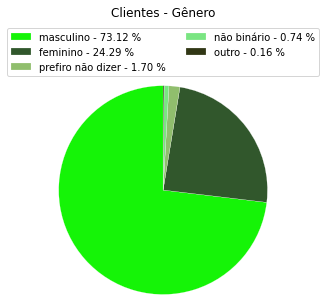

In [30]:
y = customer_gender.values
x = customers_case['gender'].value_counts().index

colors = ['#15F407','#31572c','#90be6d', '#7ae582','#313715']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors, startangle=90, radius=1.2, wedgeprops = { 'linewidth' : 0.2, 'edgecolor' : 'white' })
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(.5,1),ncol=2,
           fontsize=10)
plt.title('Clientes - Gênero', pad=65)


Do total de clientes do dataset customers_case a grande maioria, 73,12% é do gênero masculino. Cerca de 1/4 do total de clientes é do gênero feminino.

#### Idade

In [31]:
customers_case['age'].describe()

count    5130.000000
mean       29.062963
std        10.297397
min         7.000000
25%        22.000000
50%        26.000000
75%        32.000000
max        88.000000
Name: age, dtype: float64

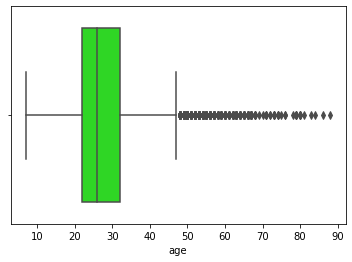

In [32]:
sns.boxplot(customers_case['age'],color ='#15F407')

In [33]:
customers_case.loc[customers_case['age']>=40]
acima40 = (606/5129)*100
acima40

11.815168648859427

A maioria dos clientes da empresa são "jovens adultos", sendo a maioria com idades compreendidas entre 22 e 32 anos. Os clientes acima de 40 anos representam cerca de 11,8% do total de clientes.

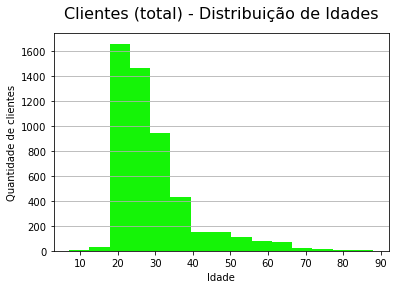

In [43]:
plt.hist(customers_case['age'], bins = 15, color ='#15F407')
plt.title('Clientes (total) - Distribuição de Idades', pad=15, fontsize=16)
plt.xlabel('Idade', fontsize=10)
plt.ylabel('Quantidade de clientes', fontsize=10)
plt.grid(axis = 'y')
plt.show()

#### Estado e Área

In [35]:
customers_case['state'].value_counts().sort_values(ascending=True)

RJ     103
DF     114
PR     141
MG     184
GO     349
SP    4239
Name: state, dtype: int64

In [36]:
customers_case['state'].value_counts(normalize=True).sort_values(ascending=True)*100

RJ     2.007797
DF     2.222222
PR     2.748538
MG     3.586745
GO     6.803119
SP    82.631579
Name: state, dtype: float64

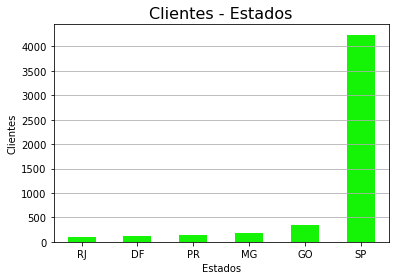

In [54]:
client_state = customers_case['state'].value_counts().sort_values(ascending=True)

client_state.plot.bar(color = '#15F407')
plt.title('Clientes - Estados',fontsize=16)
plt.ylabel('Clientes',fontsize=10)
plt.xlabel('Estados',fontsize=10)
plt.xticks(rotation = 0)
plt.grid(axis = 'y')

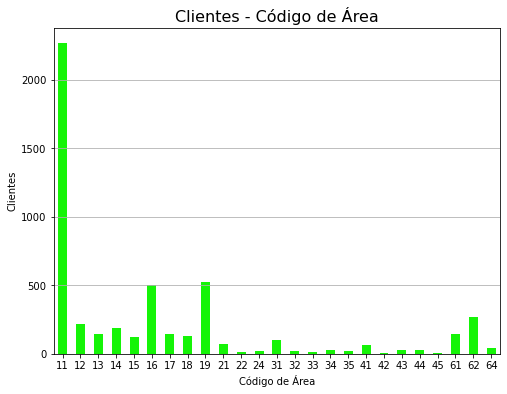

In [56]:
customers_case['areaCode'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407', figsize = (8,6))

plt.title('Clientes - Código de Área',fontsize=16)
plt.ylabel('Clientes',fontsize=10)
plt.xlabel('Código de Área',fontsize=10)
plt.xticks(rotation = 0)
plt.grid(axis = 'y')

A grande maioria dos clientes da Fluke, cerca de 82,6% são do Estado de São Paulo de cidades com DDD 11, 16 e 19. O segundo maior grupo de clientes, com cerca de 6,8% são do Estado de Goiás, que são os clientes com DDD 61, 62 e 64.

<b> Status </b>

Do conjunto de dados fornecido, a maioria dos clientes, 60,68% seguem como clientes ativos. Os clientes que solicitaram o cancelamento ou que já cancelaram os serviços representam uma parcela significativa com 18,67% e 16,30% respectivamente, somando quase 35% do total. Já os clientes pausados são compostos por um 3,49% do total e os que tiveram alguma falha no pagamento 0,86%.

Text(0.5, 1.0, 'Clientes - Status')

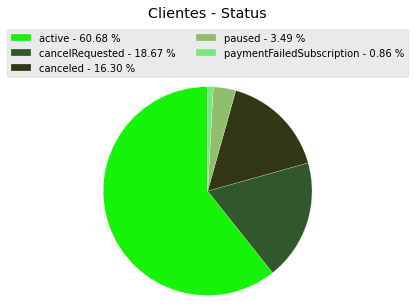

In [129]:
status = customers_case['status'].value_counts()
y = status.values
x = customers_case['status'].value_counts().sort_index(ascending = True).index

colors = ['#15F407','#31572c','#313715','#90be6d', '#7ae582']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors, startangle=90, radius=1.2, wedgeprops = { 'linewidth' : 0.2, 'edgecolor' : 'white' })
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

#sort_legend = True
#if sort_legend:
#    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
#                                          key=lambda x: x[2],
#                                          reverse=True))

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(.5,1),ncol=2,
           fontsize=10)
plt.title('Clientes - Status', pad=65)

## 4.1 Análise dos Targets

Nesta etapa analisaremos o comportamento dos clientes de acordo com o Target definido com base em seus status atuais, porém com maior enfoque no Target 1. Recordando que o Target 1 refere-se aos clientes que já cancelaram ou solicitaram o cancelamento, Target 2 os clientes que possuem possibilidade de solicitar o cancelamento em breve ('paused' e 'paymentFailedSubscription') e Target 3 os clientes ativos. A análise será realizada utilizado dataset df_total que contém a junção dos dados de customers_case e orders_case.

Text(0.5, 1.0, 'Clientes - Target')

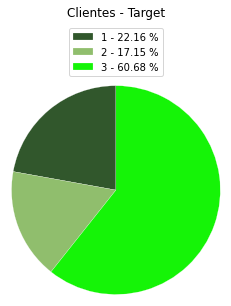

In [99]:
targets = customers_case['target'].value_counts().sort_index(ascending=True)
y = targets.values
x = targets.index

colors = ['#31572c','#90be6d','#15F407']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors, startangle=90, radius=1.2, wedgeprops = { 'linewidth' : 0.2, 'edgecolor' : 'white' })
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(.5,1),ncol=1,
           fontsize=10)
plt.title('Clientes - Target', pad=65)

De acordo com a classificação adotada, os clientes que deixam os serviços da empresa ou já manifestaram o desejo de fazê-lo (Target 1) represetam 22,16%. Os clientes com possibilidade de deixar os serviços são formados por 17,15% do total.Como visto anteriormente, os clientes ativos formam a maioria com 60,68%.

# Clientes Target 1 - Cancelados

In [204]:
target1 = df_total.loc[df_total['target']==1]
target1.head()

,customer_id,gender,status,statusUpdatedAt,statusPrevious,age,areaCode,state,recurrence,activation_date,end_portability_date,current_package,tenure,target,time_canceled,produtos,pacotes,preços,totais_por_item,created_at
12,01zSzL2oaLYLVlsHeHFyiVyyvf82,masculino,canceled,2021-02-21,cancelRequested,54,11,SP,weekly,2020-10-23,NaT,customPackage,4,1,3,Renovação do APP,1,2.0,2.0,2020-10-30
13,01zSzL2oaLYLVlsHeHFyiVyyvf82,masculino,canceled,2021-02-21,cancelRequested,54,11,SP,weekly,2020-10-23,NaT,customPackage,4,1,3,30 Minutos de Ligação,1,3.0,3.0,2020-10-30
14,01zSzL2oaLYLVlsHeHFyiVyyvf82,masculino,canceled,2021-02-21,cancelRequested,54,11,SP,weekly,2020-10-23,NaT,customPackage,4,1,3,10 SMS,1,1.0,1.0,2020-10-30
15,01zSzL2oaLYLVlsHeHFyiVyyvf82,masculino,canceled,2021-02-21,cancelRequested,54,11,SP,weekly,2020-10-23,NaT,customPackage,4,1,3,Renovação do APP,1,2.0,2.0,2020-10-23
16,01zSzL2oaLYLVlsHeHFyiVyyvf82,masculino,canceled,2021-02-21,cancelRequested,54,11,SP,weekly,2020-10-23,NaT,customPackage,4,1,3,30 Minutos de Ligação,1,3.0,3.0,2020-10-23


#### Gênero

In [124]:
gender_1 = target1['gender'].groupby(target1['customer_id']).unique().reset_index()
gender_1['gender'].value_counts()

[masculino]            813
[feminino]             173
[prefiro não dizer]     13
[não binário]            7
[outro]                  2
Name: gender, dtype: int64

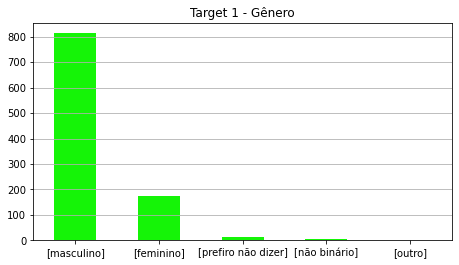

In [117]:
ax = gender_1['gender'].value_counts().plot.bar(color = '#15F407', figsize = (7.5,4))
ax.set_title('Target 1 - Gênero')
plt.xticks(rotation=0)
ax.grid(axis = 'y')

Text(0.5, 1.0, 'Target 1 - Gênero')

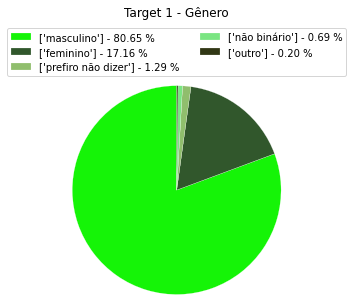

In [122]:
targets = gender_1['gender'].value_counts()
y = targets.values
x = targets.index

colors = ['#15F407','#31572c','#90be6d', '#7ae582','#313715']

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors, startangle=90, radius=1.2, wedgeprops = { 'linewidth' : 0.2, 'edgecolor' : 'white' })
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(.5,1),ncol=2,
           fontsize=10)
plt.title('Target 1 - Gênero', pad=65)

A proporção do Target 1 é mais ou menos parecida com a proporção total de clientes anteriormente, com o gênero masculino ocupando a maior fatia na divisão, com 80,65%, seguido pelo gênero feminino com 17,16%.

#### Idade

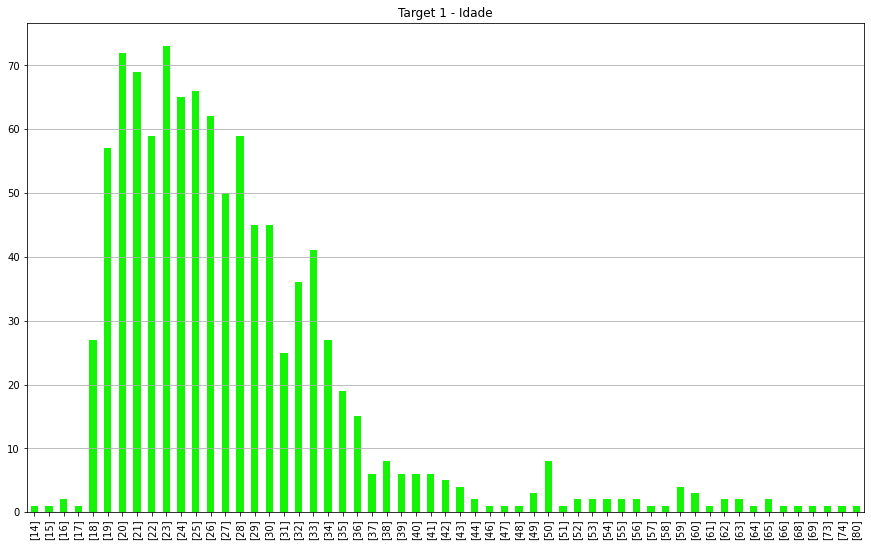

In [179]:
age_1 = target1['age'].groupby(target1['customer_id']).unique().reset_index()
ax = age_1['age'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407', figsize = (15,9))
ax.set_title('Target 1 - Idade')
ax.grid(axis = 'y')

As princpais faixas de idade dos clientes que cancelaram a conta vão desde 19 até 30 anos. Um padrão parecido com o total de clientes.

#### Status Previous

Analisamos agora, para o Target 1, o status anterior tanto dos clientes que já cancelaram os serviços, quanto dos clientes que possuem solicitação de cancelamento.

In [285]:
#Clientes cancelados
cancel_1 = target1.loc[target1['status']=='canceled']
cancel = cancel_1['statusPrevious'].groupby(cancel_1['customer_id']).unique().reset_index()
cancel['statusPrevious'].value_counts()

[cancelRequested]              856
[paused]                         6
[paymentFailedSubscription]      2
Name: statusPrevious, dtype: int64

In [159]:
cancel['statusPrevious'].value_counts(normalize=True)*100

[cancelRequested]              99.074074
[paused]                        0.694444
[paymentFailedSubscription]     0.231481
Name: statusPrevious, dtype: float64

Praticamente a totalidade dos clientes que cancelaram os serviços possuiam como status anterior a solicitação de cancelamento. Pouquissímos haviam pausado a conta ou tiveram problemas no pagamento.

In [149]:
#Clientes com solicitação de cancelamento
cancelR_1 = target1.loc[target1['status']=='cancelRequested']
cancelR = cancelR_1['statusPrevious'].groupby(cancelR_1['customer_id']).unique().reset_index()
cancelR['statusPrevious'].value_counts()

[paused]                       93
[active]                       45
[canceled]                      5
[paymentFailedSubscription]     1
Name: statusPrevious, dtype: int64

In [158]:
cancelR['statusPrevious'].value_counts(normalize=True)*100

[paused]                       64.583333
[active]                       31.250000
[canceled]                      3.472222
[paymentFailedSubscription]     0.694444
Name: statusPrevious, dtype: float64

Dos clientes que solicitaram o cancelamento mais da metade, cerca de 64,58% haviam pausado a conta anteriormente. Outros 31,25% estavam com a conta ativa.

#### Fidelidade - Depois de quanto tempo o cliente cancelou o serviço?

In [295]:
#Clientes cancelados
cancel_1 = target1.loc[target1['status']=='canceled']
cancel = cancel_1['time_canceled'].groupby(cancel_1['customer_id']).unique().reset_index()
cancel['time_canceled'].value_counts().sort_index(ascending=True)

[0]      34
[1]      75
[2]      49
[3]     216
[4]     356
[5]      70
[6]      28
[7]      10
[8]      18
[9]       7
[10]      1
Name: time_canceled, dtype: int64

In [297]:
cancel['time_canceled'].value_counts(normalize=True).sort_index(ascending=True)

[0]     0.039352
[1]     0.086806
[2]     0.056713
[3]     0.250000
[4]     0.412037
[5]     0.081019
[6]     0.032407
[7]     0.011574
[8]     0.020833
[9]     0.008102
[10]    0.001157
Name: time_canceled, dtype: float64

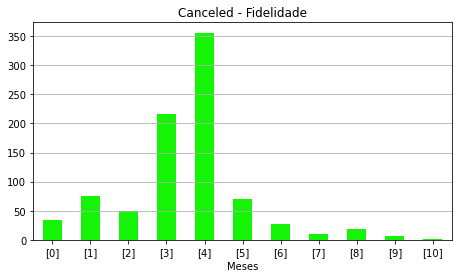

In [307]:
ax = cancel['time_canceled'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407', figsize = (7.5,4))
ax.set_title('Canceled - Fidelidade')
plt.xticks(rotation=0)
plt.xlabel('Meses')
ax.grid(axis = 'y')

In [294]:
#Clientes Cancel Requested
cancel_R = target1.loc[target1['status']=='cancelRequested']
cancelR = cancel_R['time_canceled'].groupby(cancel_R['customer_id']).unique().reset_index()
cancelR['time_canceled'].value_counts().sort_index(ascending=True)

[0]     26
[1]     11
[2]      5
[3]     43
[4]     27
[5]      7
[6]     17
[7]      3
[8]      2
[10]     1
[11]     2
Name: time_canceled, dtype: int64

In [296]:
cancelR['time_canceled'].value_counts(normalize=True).sort_index(ascending=True)

[0]     0.180556
[1]     0.076389
[2]     0.034722
[3]     0.298611
[4]     0.187500
[5]     0.048611
[6]     0.118056
[7]     0.020833
[8]     0.013889
[10]    0.006944
[11]    0.013889
Name: time_canceled, dtype: float64

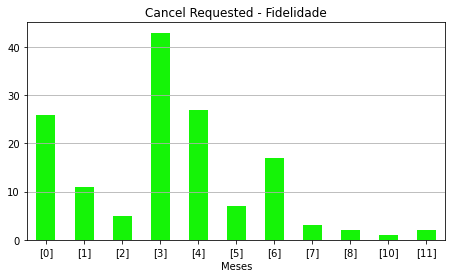

In [306]:
ax = cancelR['time_canceled'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407', figsize = (7.5,4))
ax.set_title('Cancel Requested - Fidelidade')
plt.xticks(rotation=0)
plt.xlabel('Meses')
ax.grid(axis = 'y')

Para os dois status que fazem parte dessa categoria, conforme analisando anteriormente, o tempo médio para cancelar o serviço foi após 3 ou 4 meses. Interessante observar que no caso dos clientes com status "cancelRequested", cerca de 18,05% solicitaram antes mesmo de completar 1 mês coma empresa.

#### Current Package

In [220]:
cancel_t1 = target1['current_package'].groupby(target1['customer_id']).unique().reset_index()
cancel_t1['current_package'].value_counts()

[customPackage]    999
[madePackage-0]      6
[madePackage-1]      3
Name: current_package, dtype: int64

In [286]:
cancel_t1['current_package'].value_counts(normalize=True)*100

[customPackage]    99.107143
[madePackage-0]     0.595238
[madePackage-1]     0.297619
Name: current_package, dtype: float64

In [216]:
#Clientes cancelados
cancel_1 = target1.loc[target1['status']=='canceled']
cancel = cancel_1['current_package'].groupby(cancel_1['customer_id']).unique().reset_index()
cancel['current_package'].value_counts()

[customPackage]    863
[madePackage-1]      1
Name: current_package, dtype: int64

In [217]:
#Clientes com solicitação de cancelamento
cancelR_1 = target1.loc[target1['status']=='cancelRequested']
cancelR = cancelR_1['current_package'].groupby(cancelR_1['customer_id']).unique().reset_index()
cancelR['current_package'].value_counts()

[customPackage]    136
[madePackage-0]      6
[madePackage-1]      2
Name: current_package, dtype: int64

No momento do cancelamento ou da solicitação, quase todos os clientes contavam com o pacote customizado. Inexpressivos ou inexistentes resultados para os clientes com outros tipos de pacote.

#### Produtos

In [222]:
target1['produtos'].value_counts()

Renovação do APP                                                 3426
500MB de Dados Móveis                                            1091
30 Minutos de Ligação                                             608
500MB de Dados Móveis Top Up                                      523
30 Minutos de Ligação Top Up                                      247
10 SMS                                                            211
10 SMS Top Up                                                      72
5GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS        3
10GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS       3
5GB de Dados Móveis | Minutos de Ligação Ilimitados | 50 SMS        2
Name: produtos, dtype: int64

Os produtos mais recorrentes para essa categoria foram a Renovação de APP e 500MB de Dados Móveis. Os produtos 30 Minutos de Ligação e 500MB de Dados Móveis Top Up também tiveram frequências expressivas. Interessante observar que esse grupo, durante o período em que usava os serviços da fluke, não se interessou por obter pacotes com mais benefícios, como os 3 últimos listados.

In [223]:
target1['produtos'].value_counts(normalize=True)*100

Renovação do APP                                                 55.383123
500MB de Dados Móveis                                            17.636599
30 Minutos de Ligação                                             9.828645
500MB de Dados Móveis Top Up                                      8.454575
30 Minutos de Ligação Top Up                                      3.992887
10 SMS                                                            3.410928
10 SMS Top Up                                                     1.163919
5GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS      0.048497
10GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS     0.048497
5GB de Dados Móveis | Minutos de Ligação Ilimitados | 50 SMS      0.032331
Name: produtos, dtype: float64

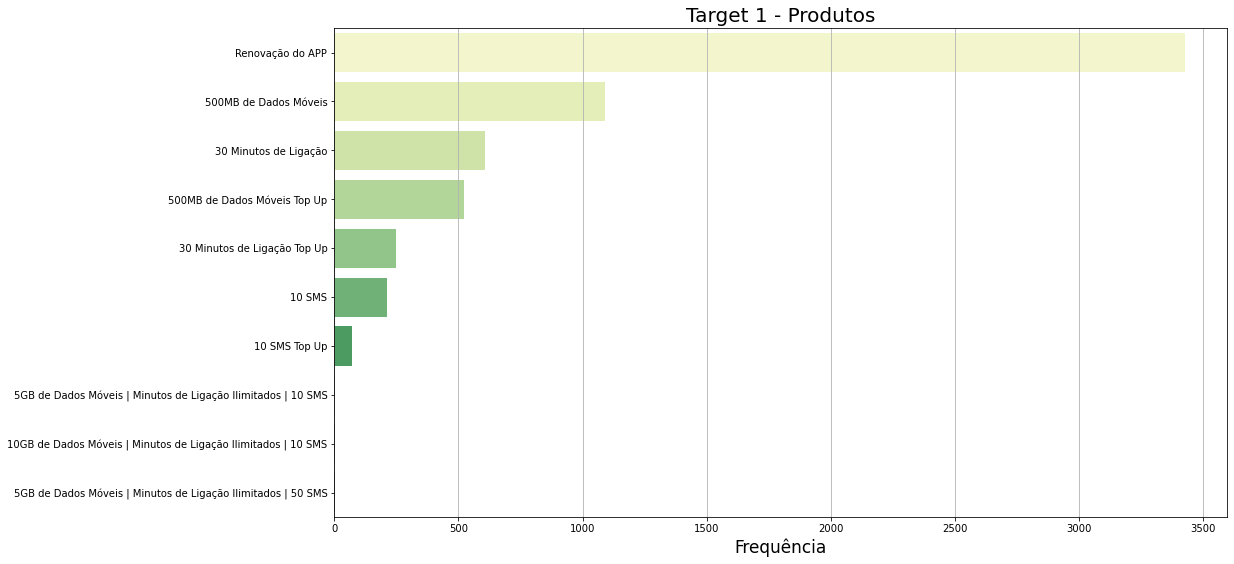

In [319]:
produtos1 = target1['produtos'].value_counts()
fig=plt.figure(figsize=(16,9))
sns.barplot(y=produtos1.index,x=produtos1.values, palette = "YlGn")
plt.title('Target 1 - Produtos',fontsize=20)
plt.xlabel('Frequência',fontsize=17)
plt.grid(axis="x")

O mesmo padrão é observado ao analisar as categorias canceled e cancelRequested individualmente.

In [238]:
(target1.loc[target1['status']=='canceled']).produtos.value_counts(normalize=True)*100

Renovação do APP                                                 55.158133
500MB de Dados Móveis                                            17.940512
30 Minutos de Ligação                                            10.128012
500MB de Dados Móveis Top Up                                      8.226657
30 Minutos de Ligação Top Up                                      3.990964
10 SMS                                                            3.463855
10 SMS Top Up                                                     1.073042
10GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS     0.018825
Name: produtos, dtype: float64

In [237]:
(target1.loc[target1['status']=='cancelRequested']).produtos.value_counts(normalize=True)*100

Renovação do APP                                                 56.750572
500MB de Dados Móveis                                            15.789474
500MB de Dados Móveis Top Up                                      9.839817
30 Minutos de Ligação                                             8.009153
30 Minutos de Ligação Top Up                                      4.004577
10 SMS                                                            3.089245
10 SMS Top Up                                                     1.716247
5GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS      0.343249
10GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS     0.228833
5GB de Dados Móveis | Minutos de Ligação Ilimitados | 50 SMS      0.228833
Name: produtos, dtype: float64

#### Recurrence - Recorrência de renovação do plano

In [272]:
target1['recurrence'].value_counts().reset_index()

,index,recurrence
0,weekly,5409
1,monthly,777


Text(0.5, 1.0, 'Target 1 - Recorrência de renovação')

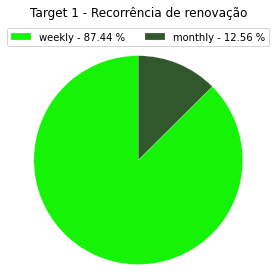

In [282]:
data = target1['recurrence'].value_counts()
y = data.values
x = data.index

colors = ['#15F407','#31572c']

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors, startangle=90, radius=1.2, wedgeprops = { 'linewidth' : 0.2, 'edgecolor' : 'white' })
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(.5,1),ncol=2,
           fontsize=10)
plt.title('Target 1 - Recorrência de renovação', pad=35)

A grande maioria dos clientes target1 realizou a renovação dos planos semanalmente, com cerca de 87,44%. Analisando separadamente para as duas categorias, o mesmo padrão foi observado.

In [283]:
#Clientes Canceled
(target1.loc[target1['status']=='canceled']).recurrence.value_counts(normalize=True)

weekly     0.916416
monthly    0.083584
Name: recurrence, dtype: float64

In [284]:
#Clientes Cancel Requested
(target1.loc[target1['status']=='cancelRequested']).recurrence.value_counts(normalize=True)

weekly     0.618993
monthly    0.381007
Name: recurrence, dtype: float64

#### Preços - Quanto gasta cada cliente?

In [239]:
#Quanto gasta cada cliente
target1_gastos = target1['preços'].groupby(target1['customer_id']).sum().reset_index()
target1_gastos.head()

,customer_id,preços
0,01zSzL2oaLYLVlsHeHFyiVyyvf82,12.0
1,074mArNYDzPCPXfGYvbNQDTACg72,2.0
2,09NhDHRhCYZOKcOY2rqZtp0GYww2,12.0
3,0CLWEwH3TXVRTasXN74mSfX72JA3,60.0
4,0F0CqI3km0NnapAPDYvpwGDZkZ33,39.0


In [179]:
target1_gastos.describe()

,preços
count,1008.000000
mean,19.376706
std,25.727393
min,2.000000
25%,5.000000
50%,11.000000
75%,23.000000
max,288.000000


In [252]:
target1_gastos['preços'].value_counts().sort_values(ascending=False)

2.00      183
8.00      107
11.00      66
12.00      60
4.00       47
         ... 
72.98       1
48.99       1
168.93      1
72.91       1
87.00       1
Name: preços, Length: 150, dtype: int64

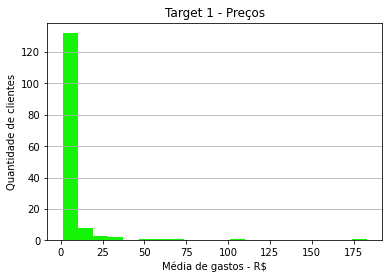

In [290]:
ax = target1_gastos['preços'].value_counts().sort_values(ascending=False).plot.hist(bins = 20, color ='#15F407')
ax.set_title('Target 1 - Preços')
ax.set_ylabel('Quantidade de clientes')
ax.set_xlabel('Média de gastos - R$')

ax.grid(axis = 'y')

A média de gastos dos clientes target1 é de aproximadamente 19,37 reais. Porém, uma quantidade expressiva de clientes gastou valores ainda mais baixos que a média, como apenas 2,00 ou 8,00 reais.

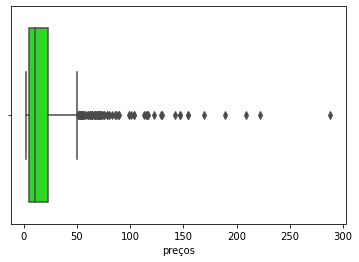

In [251]:
sns.boxplot(target1_gastos['preços'], color = '#15F407')

In [255]:
#Canceled
canceled = target1.loc[target1['status']=='canceled']
canceled_gastos = canceled['preços'].groupby(canceled['customer_id']).sum().reset_index()
canceled_gastos.head()

,customer_id,preços
0,01zSzL2oaLYLVlsHeHFyiVyyvf82,12.0
1,09NhDHRhCYZOKcOY2rqZtp0GYww2,12.0
2,0F0CqI3km0NnapAPDYvpwGDZkZ33,39.0
3,0J7JKPqUjaYvpnHSJPN0AzPy5px1,11.0
4,0No2QUB3abepgreTj0gqggAplFx1,27.0


In [256]:
canceled_gastos.describe()

,preços
count,864.000000
mean,19.182095
std,25.112061
min,2.000000
25%,6.000000
50%,11.000000
75%,22.000000
max,288.000000


In [257]:
canceled_gastos['preços'].value_counts().sort_values(ascending=False)

2.00      148
8.00      101
11.00      55
12.00      54
4.00       44
         ... 
7.99        1
63.98       1
13.98       1
42.96       1
113.00      1
Name: preços, Length: 136, dtype: int64

In [259]:
#Cancel Requested
cancelRequested = target1.loc[target1['status']=='cancelRequested']
cancelRequested_gastos = cancelRequested['preços'].groupby(cancelRequested['customer_id']).sum().reset_index()
cancelRequested_gastos.head()

,customer_id,preços
0,074mArNYDzPCPXfGYvbNQDTACg72,2.0
1,0CLWEwH3TXVRTasXN74mSfX72JA3,60.0
2,1KnwL3K6aocyuIboPpvADT0Gkop1,12.0
3,1cXobIvb8Te9L2pZEzCxJdjpFkj2,18.0
4,1u6PgnzZ9vU0vZD8COlkrkUdRPs2,2.0


In [260]:
cancelRequested['preços'].describe()

count    874.000000
mean       3.384886
std        4.174789
min        1.000000
25%        2.000000
50%        2.000000
75%        4.990000
max       49.990000
Name: preços, dtype: float64

In [262]:
cancelRequested['preços'].value_counts().sort_values(ascending=False)

2.00     496
6.00     170
3.00     105
4.99      54
1.00      42
49.99      4
39.99      3
Name: preços, dtype: int64

Analisando separadamente, a média de gastos dos clientes com o atual status de "cancelRequested" foi de aproximadamente 3,38 reais, muito menor se comparada à dos clientes "canceled" de 19,18 reais.

#### Código de área e Estado

In [337]:
area1 = target1['areaCode'].groupby(target1['customer_id']).unique().reset_index()
area1['areaCode'].value_counts().sort_index(ascending=True)

[11]    512
[12]     48
[13]     39
[14]     45
[15]     31
[16]     67
[17]     35
[18]     40
[19]    107
[21]      2
[24]      2
[31]      5
[32]      1
[34]      2
[41]      5
[42]      1
[43]      2
[45]      1
[61]      8
[62]     51
[64]      4
Name: areaCode, dtype: int64

In [338]:
area1['areaCode'].value_counts(normalize=True).sort_index(ascending=True)

[11]    0.507937
[12]    0.047619
[13]    0.038690
[14]    0.044643
[15]    0.030754
[16]    0.066468
[17]    0.034722
[18]    0.039683
[19]    0.106151
[21]    0.001984
[24]    0.001984
[31]    0.004960
[32]    0.000992
[34]    0.001984
[41]    0.004960
[42]    0.000992
[43]    0.001984
[45]    0.000992
[61]    0.007937
[62]    0.050595
[64]    0.003968
Name: areaCode, dtype: float64

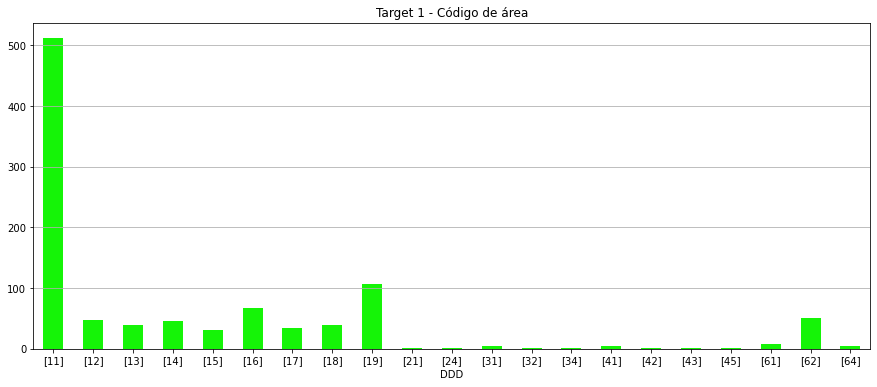

In [339]:
ax = area1['areaCode'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407', figsize = (15,6))
ax.set_title("Target 1 - Código de área")
plt.xticks(rotation=0)
plt.xlabel('DDD')
ax.grid(axis = 'y')

In [335]:
area1 = target1['state'].groupby(target1['customer_id']).unique().reset_index()
area1['state'].value_counts().sort_values(ascending=False)

[SP]    924
[GO]     56
[PR]      9
[MG]      8
[DF]      7
[RJ]      4
Name: state, dtype: int64

A maioria dos clientes target 1 são provenientes de localidades con DDD 11, seguidos de localidades com DDD 19. Ambos do Estado de São Paulo.

# Clientes Target 2

Os dados a seguir referem-se aos targets 2 e 3 com a finalidade de comparar os valores com os do target 1. Não foram realizadas análises profundas dessas informações, uma vez que o objetivo principal foi definir o perfil do target 1. Porém, as informações estatísticas e gráficos aqui contidos são facilmente compreensíveis no âmbito da resolução deste desafio.

In [340]:
target2 = df_total.loc[df_total['target']==2]
target2.head()

,customer_id,gender,status,statusUpdatedAt,statusPrevious,age,areaCode,state,recurrence,activation_date,end_portability_date,current_package,tenure,target,time_canceled,produtos,pacotes,preços,totais_por_item,created_at
0,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2,Renovação do APP,4,2.00,8.00,2021-11-01
1,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2,30 Minutos de Ligação Top Up,4,3.00,12.00,2020-12-28
2,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2,Renovação do APP,4,2.00,8.00,2020-12-12
3,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2,500MB de Dados Móveis,16,4.99,79.84,2020-12-12
4,00AJmuB7JTe5qJJuG99sLHthmVX2,masculino,paused,2021-02-14,paymentFailedSubscription,27,17,SP,monthly,2020-12-12,2020-12-16,customPackage,3,2,2,30 Minutos de Ligação,3,3.00,9.00,2020-12-12


In [341]:
#Gênero
gender_2 = target2['gender'].groupby(target2['customer_id']).unique().reset_index()
gender_2['gender'].value_counts()

[masculino]            621
[feminino]             178
[não binário]            8
[prefiro não dizer]      5
[outro]                  1
Name: gender, dtype: int64

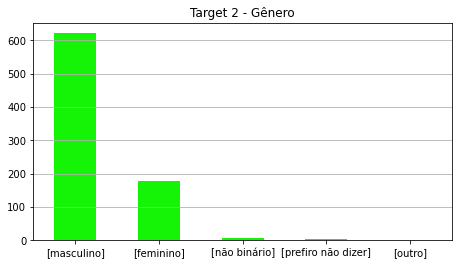

In [342]:
ax = gender_2['gender'].value_counts().plot.bar(color = '#15F407', figsize = (7.5,4))
ax.set_title('Target 2 - Gênero')
plt.xticks(rotation=0)
ax.grid(axis = 'y')

Text(0.5, 1.0, 'Target 2 - Gênero')

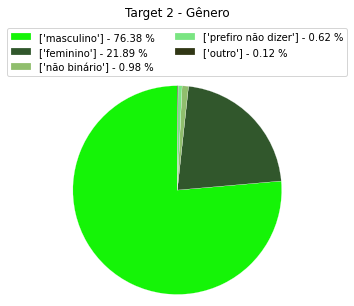

In [343]:
targets = gender_2['gender'].value_counts()
y = targets.values
x = targets.index

colors = ['#15F407','#31572c','#90be6d', '#7ae582','#313715']

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors, startangle=90, radius=1.2, wedgeprops = { 'linewidth' : 0.2, 'edgecolor' : 'white' })
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(.5,1),ncol=2,
           fontsize=10)
plt.title('Target 2 - Gênero', pad=65)

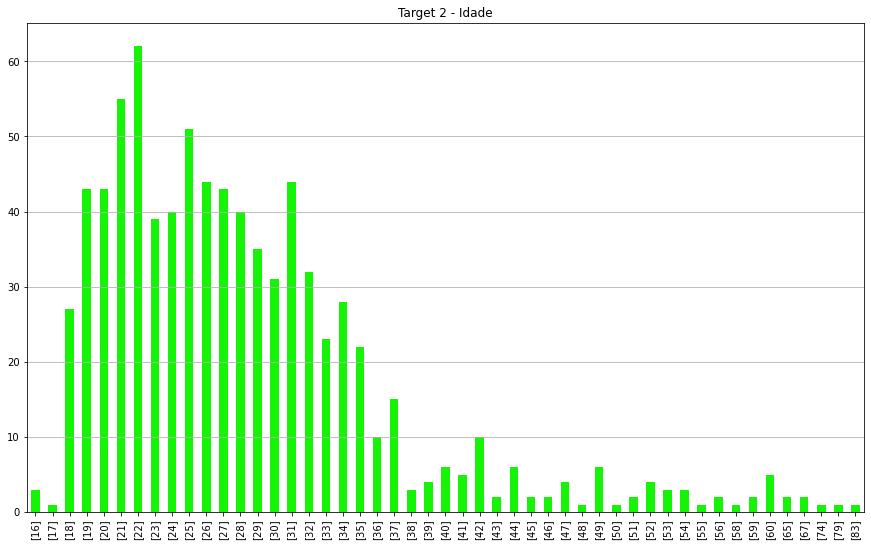

In [344]:
#Idade
age_2 = target2['age'].groupby(target2['customer_id']).unique().reset_index()
ax = age_2['age'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407', figsize = (15,9))
ax.set_title('Target 2 - Idade')
ax.grid(axis = 'y')

In [346]:
#Status Previous
status = target2['statusPrevious'].groupby(target2['customer_id']).unique().reset_index()
status['statusPrevious'].value_counts()

[paymentFailedSubscription]    492
[active]                       238
[canceled]                      58
[paused]                        24
[cancelRequested]                1
Name: statusPrevious, dtype: int64

In [350]:
#Tenure
tenure = target2['tenure'].groupby(target2['customer_id']).unique().reset_index()
tenure['tenure'].value_counts().sort_index(ascending=True)

[0]       4
[1]      89
[2]      90
[3]     258
[4]     167
[5]      59
[6]      54
[7]      72
[8]       7
[9]       4
[10]      2
[11]      4
[12]      3
Name: tenure, dtype: int64

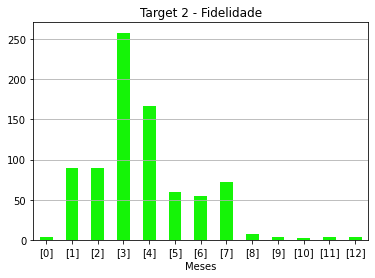

In [354]:
ax = tenure['tenure'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407')
ax.set_title('Target 2 - Fidelidade')
plt.xticks(rotation=0)
plt.xlabel('Meses')
ax.grid(axis = 'y')

In [355]:
#Current Package
packaget2= target2['current_package'].groupby(target2['customer_id']).unique().reset_index()
packaget2['current_package'].value_counts()

[customPackage]    795
[madePackage-0]      9
[madePackage-1]      5
[madePackage-3]      3
[madePackage-2]      1
Name: current_package, dtype: int64

In [356]:
#Produtos
target2['produtos'].value_counts()

Renovação do APP                                                 3921
500MB de Dados Móveis                                            1151
500MB de Dados Móveis Top Up                                      790
30 Minutos de Ligação                                             750
30 Minutos de Ligação Top Up                                      346
10 SMS                                                            245
10 SMS Top Up                                                     100
5GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS       10
10GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS       5
5GB de Dados Móveis | Minutos de Ligação Ilimitados | 50 SMS        4
10GB de Dados Móveis | Minutos de Ligação Ilimitados | 50 SMS       2
30GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS       2
30GB de Dados Móveis | Minutos de Ligação Ilimitados | 50 SMS       1
20GB de Dados Móveis | Minutos de Ligação Ilimitados | 50 SMS       1
Name: produtos, dtyp

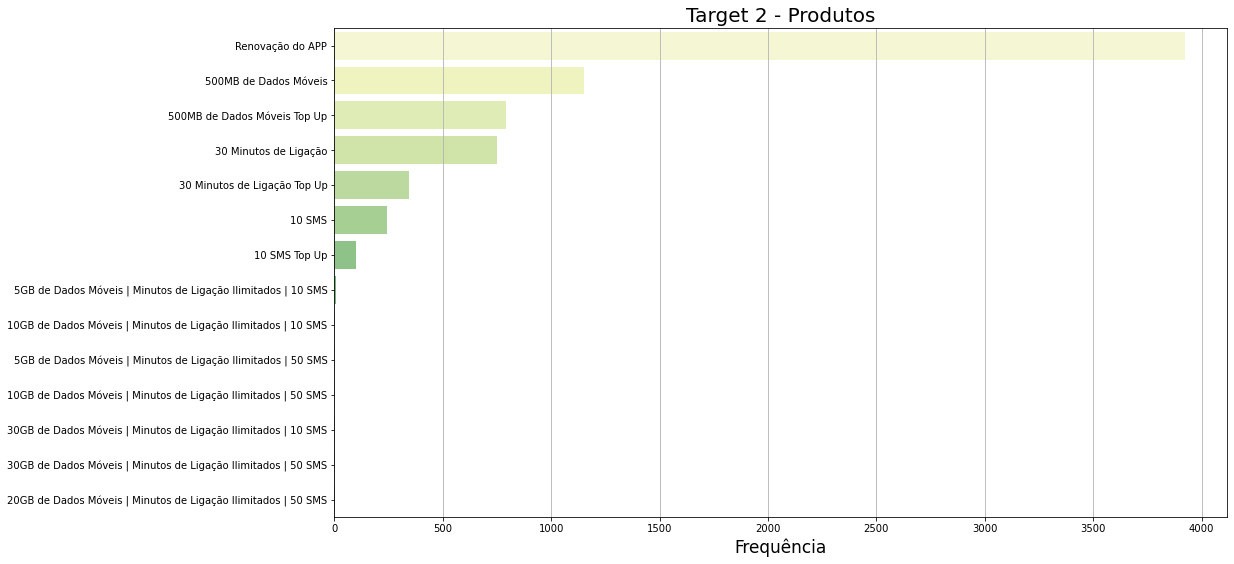

In [357]:
produtos2 = target2['produtos'].value_counts()
fig=plt.figure(figsize=(16,9))
sns.barplot(y=produtos2.index,x=produtos2.values, palette = "YlGn")
plt.title('Target 2 - Produtos',fontsize=20)
plt.xlabel('Frequência',fontsize=17)
plt.grid(axis="x")

In [358]:
#recurrence
target2['recurrence'].value_counts().reset_index()

,index,recurrence
0,weekly,4900
1,monthly,2428


Text(0.5, 1.0, 'Target 2 - Recorrência de renovação')

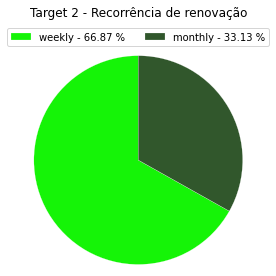

In [359]:
data = target2['recurrence'].value_counts()
y = data.values
x = data.index

colors = ['#15F407','#31572c']

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors, startangle=90, radius=1.2, wedgeprops = { 'linewidth' : 0.2, 'edgecolor' : 'white' })
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(.5,1),ncol=2,
           fontsize=10)
plt.title('Target 2 - Recorrência de renovação', pad=35)

In [360]:
#Preços
#Quanto gasta cada cliente
target2_gastos = target2['preços'].groupby(target2['customer_id']).sum().reset_index()
target2_gastos.head()

,customer_id,preços
0,00AJmuB7JTe5qJJuG99sLHthmVX2,15.99
1,02N1mXy2jWVv29wMwo3j3D9NRTM2,9.99
2,03bpVdZNj2fNooC4QW2pZ5KgHyx1,29.00
3,05Vyqxi1cgYtIbJL85B6iinxhn22,4.00
4,0847ee5ObXeObe2yainHYm43sDq2,28.97


In [361]:
target2_gastos.describe()

,preços
count,813.000000
mean,28.838647
std,36.581838
min,2.000000
25%,6.990000
50%,15.000000
75%,33.990000
max,270.970000


In [362]:
target2_gastos['preços'].value_counts().sort_values(ascending=False)

2.00      74
6.99      45
4.00      43
9.99      36
6.00      29
          ..
116.94     1
135.99     1
25.98      1
117.95     1
35.00      1
Name: preços, Length: 267, dtype: int64

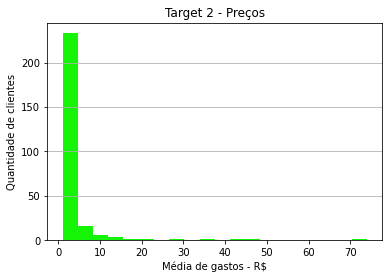

In [365]:
ax = target2_gastos['preços'].value_counts().sort_values(ascending=False).plot.hist(bins = 20, color ='#15F407')
ax.set_title('Target 2 - Preços')
ax.set_ylabel('Quantidade de clientes')
ax.set_xlabel('Média de gastos - R$')

ax.grid(axis = 'y')

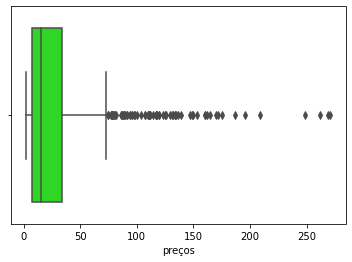

In [366]:
sns.boxplot(target2_gastos['preços'], color = '#15F407')

In [367]:
#Código de Área e Estado
area2 = target2['areaCode'].groupby(target2['customer_id']).unique().reset_index()
area2['areaCode'].value_counts().sort_index(ascending=True)

[11]    338
[12]     41
[13]     24
[14]     27
[15]     17
[16]     49
[17]     31
[18]     23
[19]     83
[21]      8
[22]      1
[24]      3
[31]     15
[32]      2
[33]      1
[34]      3
[41]      6
[42]      1
[43]      6
[44]      2
[61]     52
[62]     71
[64]      9
Name: areaCode, dtype: int64

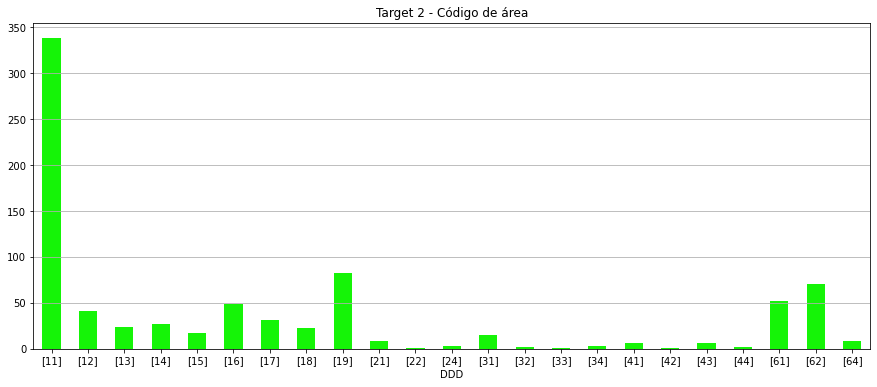

In [368]:
ax = area2['areaCode'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407', figsize = (15,6))
ax.set_title("Target 2 - Código de área")
plt.xticks(rotation=0)
plt.xlabel('DDD')
ax.grid(axis = 'y')

# Target 3

In [370]:
target3 = df_total.loc[df_total['target']==3]
target3.head()

,customer_id,gender,status,statusUpdatedAt,statusPrevious,age,areaCode,state,recurrence,activation_date,end_portability_date,current_package,tenure,target,time_canceled,produtos,pacotes,preços,totais_por_item,created_at
6,011nhqQ4gyMCNfwLdjjXaRPo5PF3,masculino,active,2021-03-03,activationComplete,32,64,GO,monthly,2021-03-03,2021-03-06,customPackage,0,3,0,10GB de Dados Móveis | Minutos de Ligação Ilim...,1,49.99,49.99,2021-09-03
7,011nhqQ4gyMCNfwLdjjXaRPo5PF3,masculino,active,2021-03-03,activationComplete,32,64,GO,monthly,2021-03-03,2021-03-06,customPackage,0,3,0,500MB de Dados Móveis Top Up,2,4.99,9.98,2021-06-03
8,011nhqQ4gyMCNfwLdjjXaRPo5PF3,masculino,active,2021-03-03,activationComplete,32,64,GO,monthly,2021-03-03,2021-03-06,customPackage,0,3,0,30 Minutos de Ligação Top Up,1,3.00,3.00,2021-06-03
9,011nhqQ4gyMCNfwLdjjXaRPo5PF3,masculino,active,2021-03-03,activationComplete,32,64,GO,monthly,2021-03-03,2021-03-06,customPackage,0,3,0,500MB de Dados Móveis Top Up,1,4.99,4.99,2021-03-03
10,011nhqQ4gyMCNfwLdjjXaRPo5PF3,masculino,active,2021-03-03,activationComplete,32,64,GO,monthly,2021-03-03,2021-03-06,customPackage,0,3,0,Renovação do APP,4,2.00,8.00,2021-03-03


In [371]:
#Gênero
gender_3 = target3['gender'].groupby(target3['customer_id']).unique().reset_index()
gender_3['gender'].value_counts()

[masculino]            2101
[feminino]              836
[prefiro não dizer]      35
[não binário]            17
[outro]                   4
Name: gender, dtype: int64

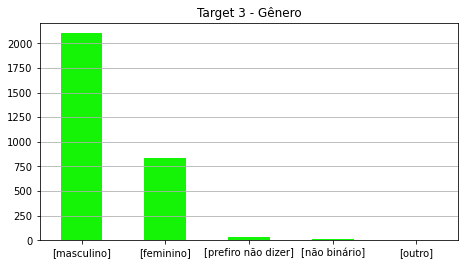

In [372]:
ax = gender_3['gender'].value_counts().plot.bar(color = '#15F407', figsize = (7.5,4))
ax.set_title('Target 3 - Gênero')
plt.xticks(rotation=0)
ax.grid(axis = 'y')

Text(0.5, 1.0, 'Target 3 - Gênero')

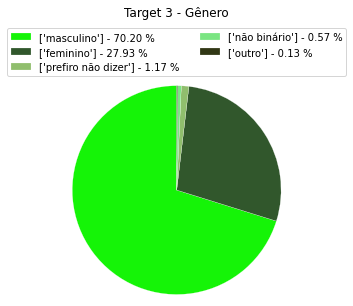

In [373]:
targets = gender_3['gender'].value_counts()
y = targets.values
x = targets.index

colors = ['#15F407','#31572c','#90be6d', '#7ae582','#313715']

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors, startangle=90, radius=1.2, wedgeprops = { 'linewidth' : 0.2, 'edgecolor' : 'white' })
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(.5,1),ncol=2,
           fontsize=10)
plt.title('Target 3 - Gênero', pad=65)

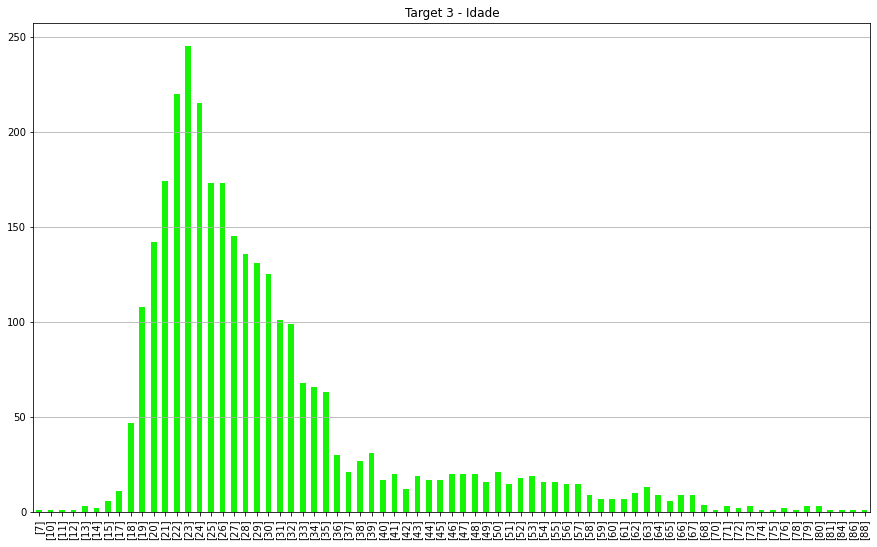

In [374]:
#Idade
age_3 = target3['age'].groupby(target3['customer_id']).unique().reset_index()
ax = age_3['age'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407', figsize = (15,9))
ax.set_title('Target 3 - Idade')
ax.grid(axis = 'y')

In [375]:
#Status Previous
status = target3['statusPrevious'].groupby(target3['customer_id']).unique().reset_index()
status['statusPrevious'].value_counts()

[processingSubscription]       2252
[activationComplete]            531
[paused]                        167
[activation]                     20
[cancelRequested]                16
[processingTopUp]                 6
[paymentFailedSubscription]       1
Name: statusPrevious, dtype: int64

In [376]:
#Tenure
tenure = target3['tenure'].groupby(target3['customer_id']).unique().reset_index()
tenure['tenure'].value_counts().sort_index(ascending=True)

[0]     305
[1]     516
[2]     209
[3]     380
[4]     431
[5]     295
[6]     304
[7]     347
[8]      67
[9]      41
[10]     27
[11]     38
[12]     33
Name: tenure, dtype: int64

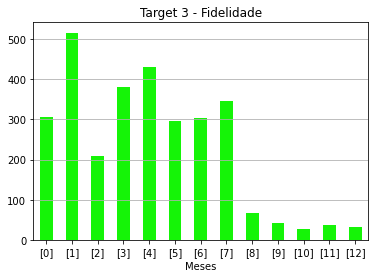

In [377]:
ax = tenure['tenure'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407')
ax.set_title('Target 3 - Fidelidade')
plt.xticks(rotation=0)
plt.xlabel('Meses')
ax.grid(axis = 'y')

In [378]:
#Current Package
packaget3= target3['current_package'].groupby(target3['customer_id']).unique().reset_index()
packaget3['current_package'].value_counts()

[customPackage]    2491
[madePackage-0]     258
[madePackage-1]     219
[madePackage-3]      14
[madePackage-2]      11
Name: current_package, dtype: int64

In [379]:
#Produtos
target3['produtos'].value_counts()

Renovação do APP                                                 31288
500MB de Dados Móveis Top Up                                      8073
500MB de Dados Móveis                                             7546
30 Minutos de Ligação                                             4173
30 Minutos de Ligação Top Up                                      3264
10 SMS                                                            1174
10 SMS Top Up                                                      595
5GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS       302
10GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS      253
5GB de Dados Móveis | Minutos de Ligação Ilimitados | 50 SMS        33
30GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS       16
10GB de Dados Móveis | Minutos de Ligação Ilimitados | 50 SMS       12
20GB de Dados Móveis | Minutos de Ligação Ilimitados | 10 SMS       11
30GB de Dados Móveis | Minutos de Ligação Ilimitados | 50 SMS        1
Name: 

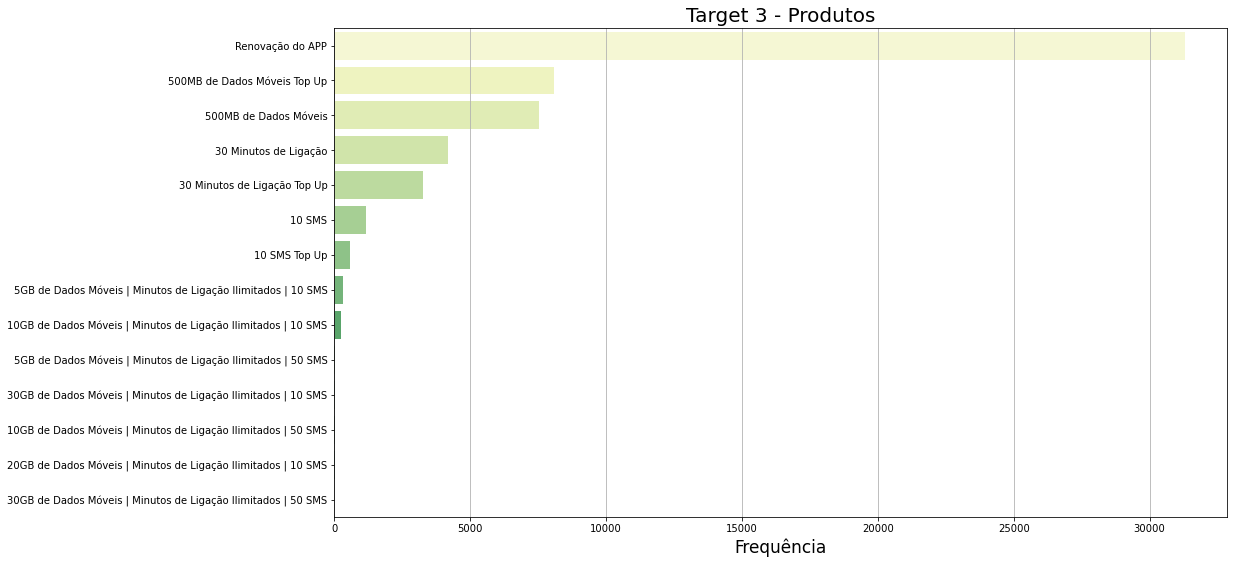

In [380]:
produtos3= target3['produtos'].value_counts()
fig=plt.figure(figsize=(16,9))
sns.barplot(y=produtos3.index,x=produtos3.values, palette = "YlGn")
plt.title('Target 3 - Produtos',fontsize=20)
plt.xlabel('Frequência',fontsize=17)
plt.grid(axis="x")

In [381]:
#recurrence
target3['recurrence'].value_counts().reset_index()

,index,recurrence
0,monthly,28989
1,weekly,27752


Text(0.5, 1.0, 'Target 3 - Recorrência de renovação')

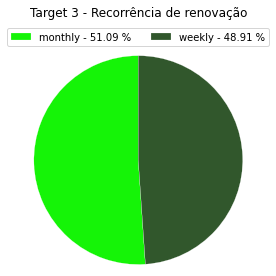

In [382]:
data = target3['recurrence'].value_counts()
y = data.values
x = data.index

colors = ['#15F407','#31572c']

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors = colors, startangle=90, radius=1.2, wedgeprops = { 'linewidth' : 0.2, 'edgecolor' : 'white' })
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(.5,1),ncol=2,
           fontsize=10)
plt.title('Target 3 - Recorrência de renovação', pad=35)

In [383]:
#Preços
#Quanto gasta cada cliente
target3_gastos = target3['preços'].groupby(target3['customer_id']).sum().reset_index()
target3_gastos.head()

,customer_id,preços
0,011nhqQ4gyMCNfwLdjjXaRPo5PF3,66.97
1,027onaL5DKXWigqGc4ZOiBniTJC2,73.98
2,02DozqKFn1RmId9AKn0xPumtb8L2,217.89
3,02LXPVt3aogCJUuHuAsxxoENekt2,13.98
4,02zv4oiyIugUuWGOgE0jgLZC2kr1,49.99


In [386]:
target3_gastos.describe()

,preços
count,2993.000000
mean,66.936779
std,69.194333
min,2.000000
25%,21.980000
50%,49.990000
75%,89.960000
max,1161.670000


In [384]:
target3_gastos['preços'].value_counts().sort_values(ascending=False)

39.99     120
49.99     118
9.99       73
6.99       50
2.00       45
         ... 
120.87      1
161.97      1
316.80      1
64.95       1
39.97       1
Name: preços, Length: 1120, dtype: int64

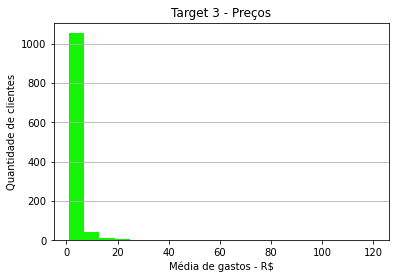

In [385]:
ax = target3_gastos['preços'].value_counts().sort_values(ascending=False).plot.hist(bins = 20, color ='#15F407')
ax.set_title('Target 3 - Preços')
ax.set_ylabel('Quantidade de clientes')
ax.set_xlabel('Média de gastos - R$')

ax.grid(axis = 'y')

In [387]:
#Código de Área e Estado
area3 = target3['areaCode'].groupby(target3['customer_id']).unique().reset_index()
area3['areaCode'].value_counts().sort_index(ascending=True)

[11]    1273
[12]     121
[13]      66
[14]     101
[15]      68
[16]     365
[17]      72
[18]      56
[19]     314
[21]      56
[22]      10
[24]      13
[31]      78
[32]      15
[33]      10
[34]      25
[35]      17
[41]      53
[42]       5
[43]      23
[44]      24
[45]       7
[61]      80
[62]     115
[64]      26
Name: areaCode, dtype: int64

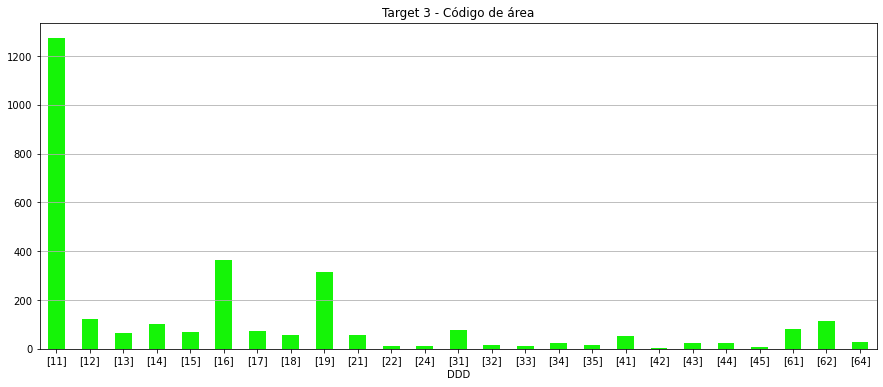

In [388]:
ax = area3['areaCode'].value_counts().sort_index(ascending=True).plot.bar(color = '#15F407', figsize = (15,6))
ax.set_title("Target 3 - Código de área")
plt.xticks(rotation=0)
plt.xlabel('DDD')
ax.grid(axis = 'y')